<a href="https://colab.research.google.com/github/2303A52189/AIML_2303A52189/blob/main/aiml_6_2303A52189.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbor Classification

Import packages and data set

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/archive (22).zip",sep=',', index_col=0)
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,,,,,,,,,,,,
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 13300000 to 1750000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
dtypes: int64(5), object(7)
memory usage: 55.4+ KB


In [ ]:
df.describe()

,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.693578
std,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,3.000000


Check the spread of the features

In [ ]:
l=list(df.columns)
l[0:len(l)-2]

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking']

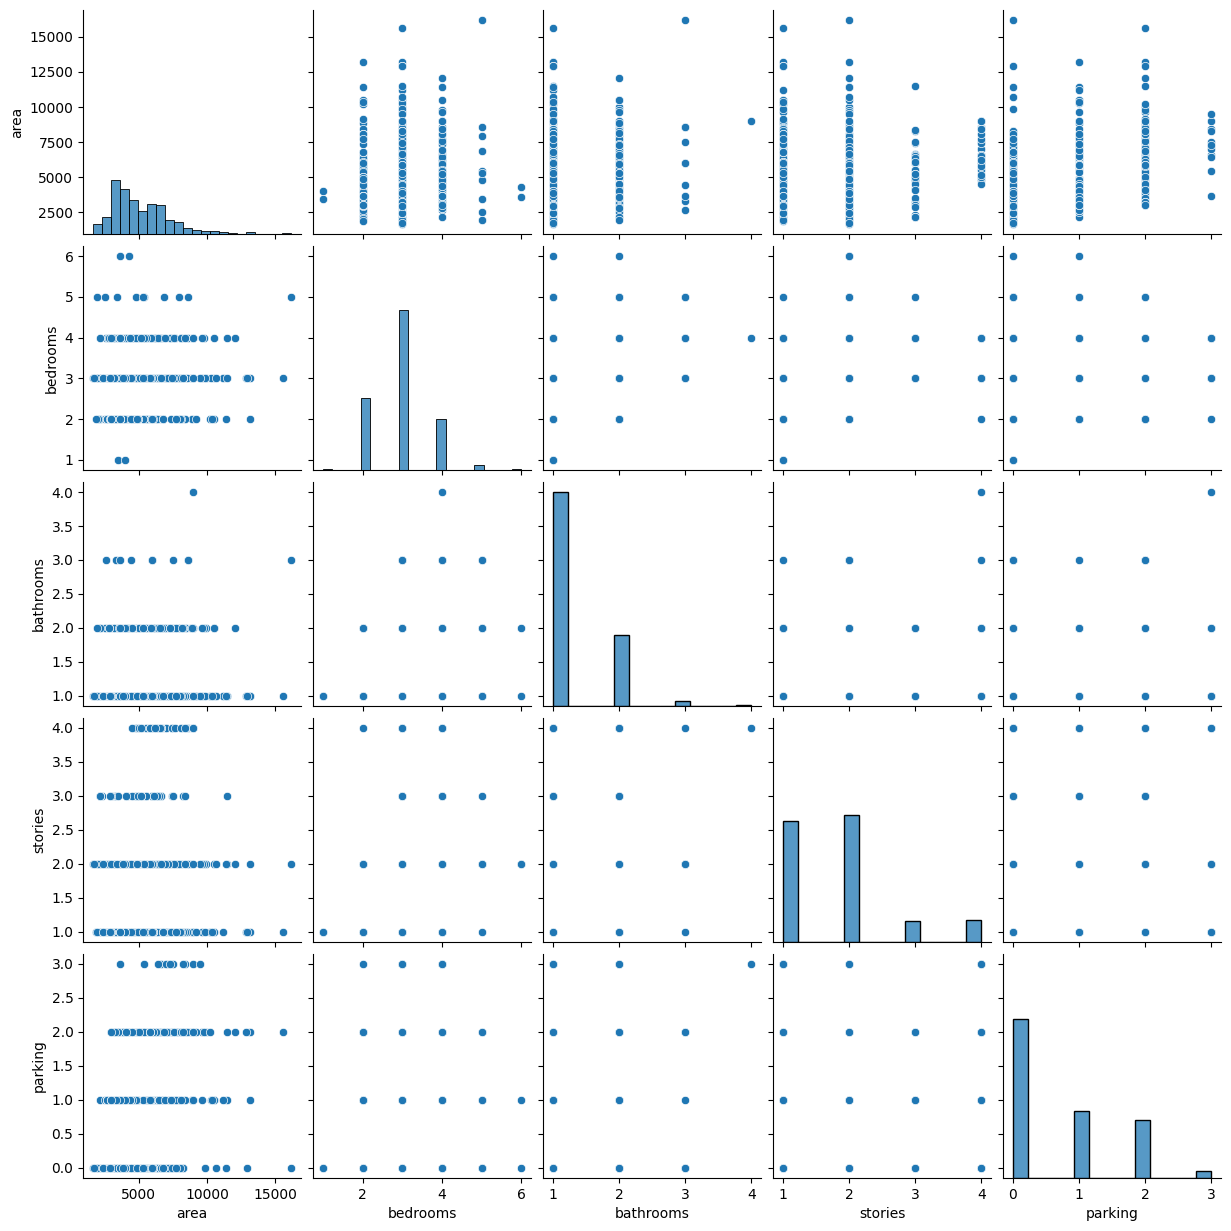

In [ ]:
sns.pairplot(df)

dentify the Target Classes from the Dataset and their Counts

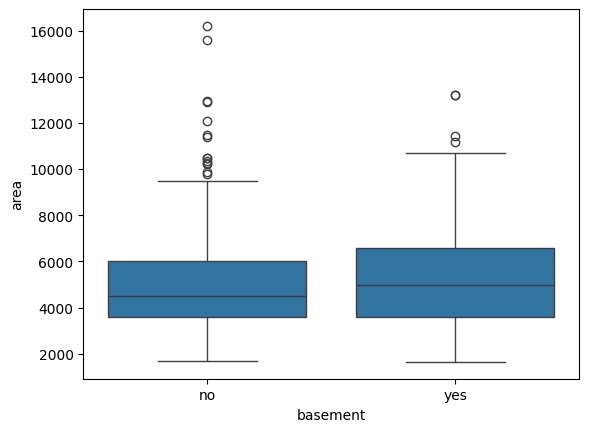

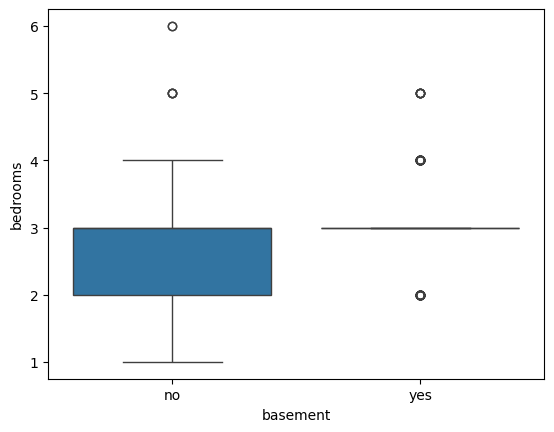

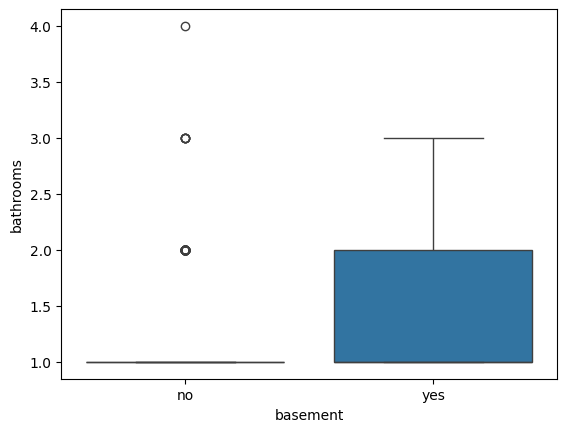

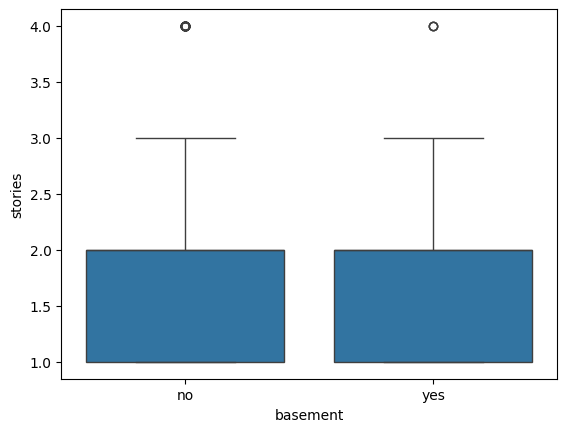

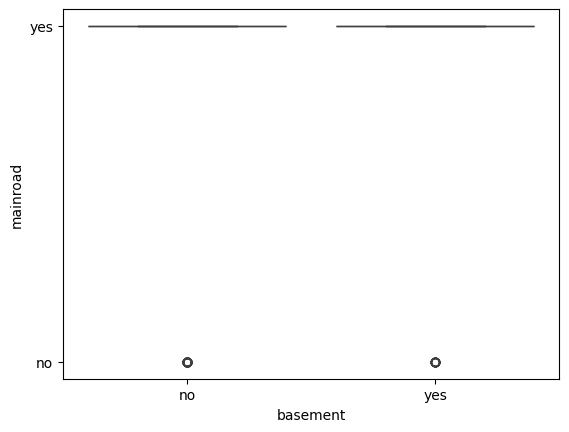

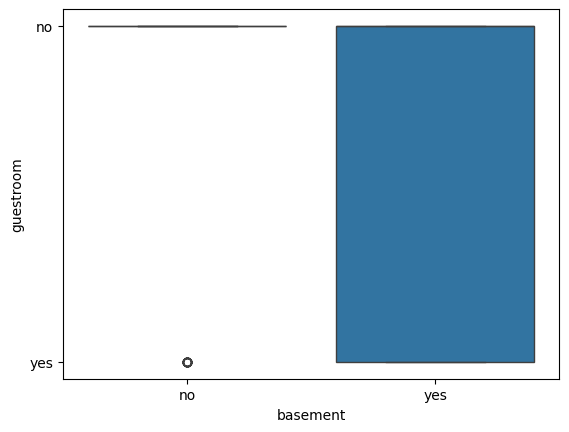

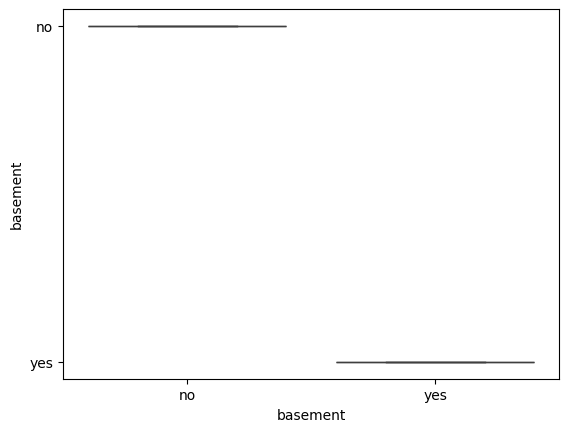

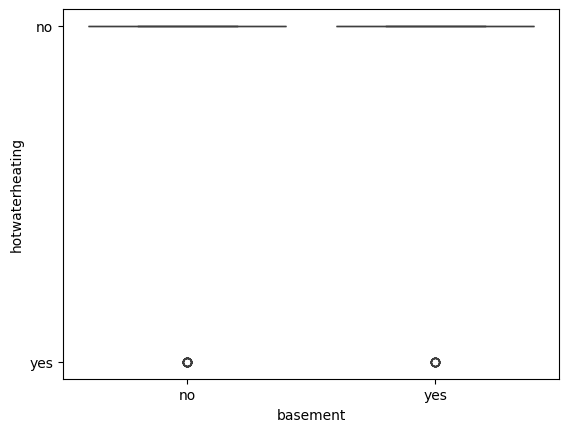

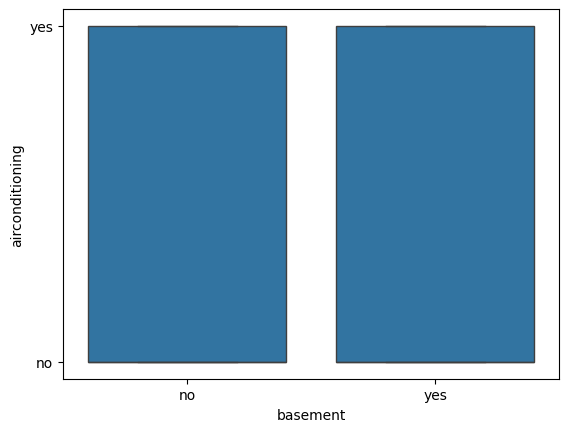

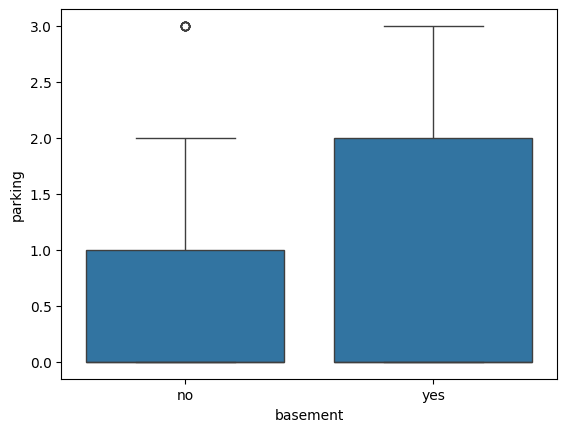

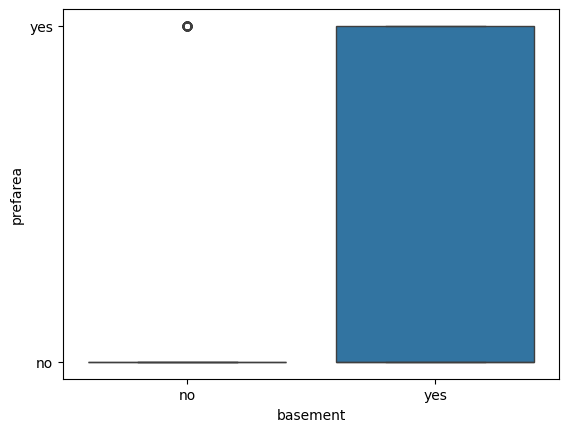

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(len(l)-1):
    sns.boxplot(x='basement',y=l[i], data=df)
    plt.figure()

Scale the features using sklearn.preprocessing package

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Fit the features data only to this estimator
(leaving the TARGET CLASS column) and transform



In [ ]:
# Convert categorical 'basement' column to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(df_encoded.drop('area', axis=1))  # Adjust as needed

# Transform the data
scaled_features = scaler.transform(df_encoded.drop('area', axis=1))

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your original DataFrame
features = df.columns[:-1]  # All columns except the last one

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Create a new DataFrame with the scaled features
df_feat = pd.DataFrame(scaled_features, columns=df_encoded.columns)

# Display the first few rows
print(df_feat.head())



       area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692      0.405623   
1  1.757010  1.403419   5.405809  2.532024  2.679409      0.405623   
2  2.218232  0.047278   1.421812  0.224410  1.517692      0.405623   
3  1.083624  1.403419   1.421812  0.224410  2.679409      0.405623   
4  1.046726  1.403419  -0.570187  0.224410  1.517692      0.405623   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0      -0.465315     -0.734539            -0.219265             1.472618   
1      -0.465315     -0.734539            -0.219265             1.472618   
2      -0.465315      1.361397            -0.219265            -0.679063   
3      -0.465315      1.361397            -0.219265             1.472618   
4       2.149083      1.361397            -0.219265             1.472618   

   prefarea_yes  
0      1.804941  
1     -0.554035  
2      1.804941  
3      1.804941  
4     -0.554035  


Train/Test split, model fit and prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your original DataFrame
features = df.columns[:-1]  # All columns except the last one
target = df.columns[-1]      # Last column as the target variable

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df[target], test_size=0.2, random_state=42)

# Display shapes of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(436, 11) (109, 11) (436,) (109,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
pred = knn.predict(X_test)

Evaluation of classification quality

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[ 7 13  9]
 [16 12 11]
 [11 17 13]]


In [ ]:
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

     furnished       0.21      0.24      0.22        29
semi-furnished       0.29      0.31      0.30        39
   unfurnished       0.39      0.32      0.35        41

      accuracy                           0.29       109
     macro avg       0.30      0.29      0.29       109
  weighted avg       0.31      0.29      0.30       109



In [ ]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.706


Choosing 'k' by elbow method

In [ ]:
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

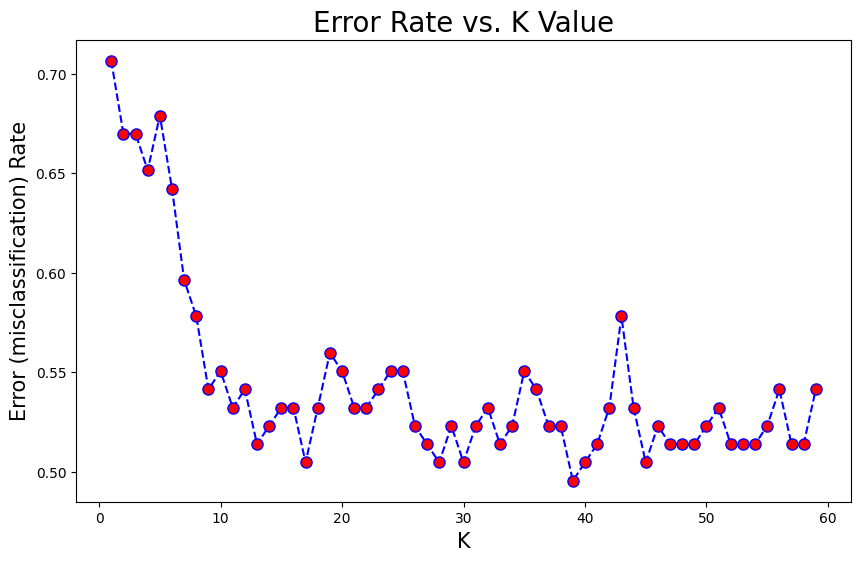

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)